### 安装TA-Lib
进入`https://www.lfd.uci.edu/~gohlke/pythonlibs`,下拉选择TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl

导入：import talib as ta

### 移动平均线
移动平均线，Moving Average，简称MA，MA是用统计分析的方法，将一定时期内的证券价格（指数）加以平均，并把不同时间的平均值连接起来，形成一根MA，用以观察证券价格变动趋势的一种技术指标。

不同类型的移动均线也有各自相应的调用函数：

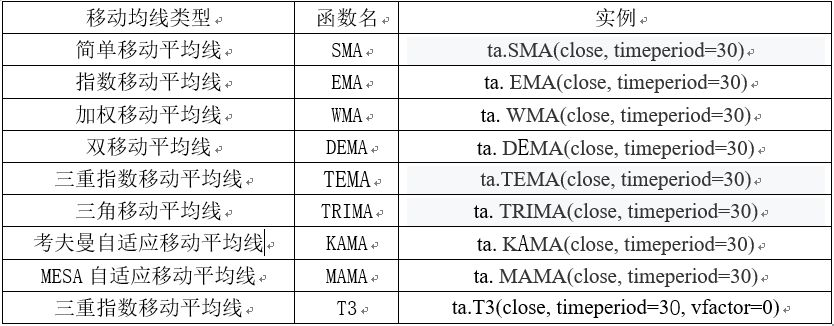

In [5]:
import numpy as np
import talib as ta
import pandas as pd
from matplotlib import pyplot as plt
import tushare as ts
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['font.family'] =['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [6]:
data = ts.get_stock_basics()

code,代码；name,名称；industry,细分行业；area,地区；pe,市盈率；outstanding,流通股本；totals,总股本(万)；totalAssets,总资产(万)；liquidAssets,流动资产；fixedAssets,固定资产；reserved,公积金；reservedPerShare,每股公积金；eps,每股收益；bvps,每股净资；pb,市净率；timeToMarket,上市日期；undp 未分配利润；perundp 每股未分配；rev 收入同比（%）；profit 利润同比（%）；gpr 毛利率（%）；npr 净利润率（%）；holders_num 股东人数

In [7]:
data

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
002966,N苏银,银行,江苏,13.39,3.33,33.33,33626784.00,0.00,309974.09,858496.81,...,7.80,1.45,20190802,573379.50,1.72,0.00,0.00,0.00,28.48,587277.0
688002,睿创微纳,通信设备,山东,237.74,0.52,4.45,124354.82,90185.59,22548.14,48676.48,...,4.95,13.95,20190722,18846.90,0.42,0.00,0.00,51.38,25.46,31039.0
688009,中国通号,运输设备,北京,47.43,11.84,105.90,8360059.00,6873413.00,391078.28,740946.50,...,3.50,3.46,20190722,930988.88,0.88,0.00,0.00,24.43,8.58,696322.0
300127,银河磁体,元器件,四川,37.23,2.27,3.23,131511.98,110735.63,17035.65,49620.26,...,3.90,4.38,20101013,30276.46,0.94,3.83,4.19,33.93,24.56,19295.0
603327,福蓉科技,元器件,四川,41.38,0.51,4.01,116960.38,62445.28,44119.55,3311.05,...,2.68,10.42,20190523,26433.50,0.66,0.00,0.00,38.51,23.46,51193.0
603613,国联股份,互联网,北京,46.64,0.35,1.41,95296.85,91682.56,0.00,0.00,...,6.72,4.32,20190730,0.00,0.00,0.00,0.00,0.00,2.09,37682.0
300748,金力永磁,元器件,江西,192.17,0.42,4.13,206665.23,158799.09,32751.21,38207.80,...,2.65,18.52,20180921,24800.22,0.60,0.00,0.00,19.77,7.35,25304.0
603233,大参林,医药商业,广东,37.97,0.83,5.20,691201.44,429523.59,83318.81,96346.28,...,6.20,8.67,20170731,173204.30,3.33,26.77,25.20,39.63,7.14,8472.0
603687,大胜达,广告包装,浙江,70.03,0.50,4.11,192834.22,70953.59,0.00,0.00,...,3.32,5.13,20190726,0.00,0.00,0.00,0.00,0.00,8.81,50518.0


In [10]:
area = data.groupby('area')['name'].count()

In [12]:
area

area
上海     297
云南      36
内蒙      25
北京     332
吉林      41
四川     124
天津      51
宁夏      14
安徽     103
山东     204
山西      37
广东     313
广西      38
新疆      55
江苏     414
江西      42
河北      57
河南      79
浙江     445
海南      31
深圳     290
湖北     103
湖南     104
甘肃      33
福建     135
西藏      18
贵州      29
辽宁      74
重庆      50
陕西      52
青海      12
黑龙江     38
Name: name, dtype: int64

In [14]:
area.sort_values(ascending=False)[:10]

area
浙江    445
江苏    414
北京    332
广东    313
上海    297
深圳    290
山东    204
福建    135
四川    124
湖南    104
Name: name, dtype: int64

In [15]:
type(area)

pandas.core.series.Series

广东（“广东304”+“深圳283”）一共有587家上市公司

In [16]:
area['广东'] = area['广东'] +area ['深圳']

In [17]:
area.sort_values(ascending=False)[:10]

area
广东    603
浙江    445
江苏    414
北京    332
上海    297
深圳    290
山东    204
福建    135
四川    124
湖南    104
Name: name, dtype: int64

In [23]:
len(area)

32

In [42]:
 area.values

array([297,  36,  25, 332,  41, 124,  51,  14, 103, 204,  37, 603,  38,
        55, 414,  42,  57,  79, 445,  31, 290, 103, 104,  33, 135,  18,
        29,  74,  50,  52,  12,  38], dtype=int64)

In [43]:
for i in range(len(area)):
    print(area.index[i]+":"+str(area.values[i] ))

上海:297
云南:36
内蒙:25
北京:332
吉林:41
四川:124
天津:51
宁夏:14
安徽:103
山东:204
山西:37
广东:603
广西:38
新疆:55
江苏:414
江西:42
河北:57
河南:79
浙江:445
海南:31
深圳:290
湖北:103
湖南:104
甘肃:33
福建:135
西藏:18
贵州:29
辽宁:74
重庆:50
陕西:52
青海:12
黑龙江:38


In [49]:
from pyecharts import Map
map = Map('中国上市公司分布')
map.add(attr= area.index,value = area.values,name="中国上市公司分布",
       is_visualmap=True,maptype='china')
map.render(path="中国上市公司分布.html")

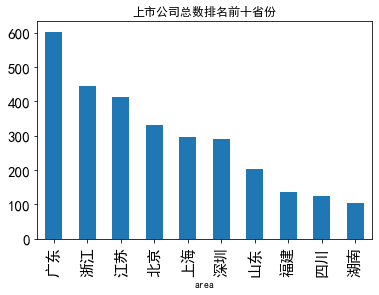

In [65]:
area.sort_values(ascending=False)[:10].plot(kind='bar',
                                            title="上市公司总数排名前十省份",
                                            fontsize=15)
                                           

In [71]:
totalAssets=data.groupby('area')['totalAssets'].sum()
totalAssets=round(totalAssets/10**8,4) 
totalAssets.sort_values(ascending=False)[:10]

area
北京    145.9672
上海     27.9990
深圳     25.1130
福建      8.7283
江苏      8.5956
浙江      5.6151
广东      4.8057
山东      3.2779
新疆      2.2043
四川      1.8614
Name: totalAssets, dtype: float64

In [72]:
#把深圳数据合并到广东
totalAssets['广东']=totalAssets['广东']+totalAssets['深圳']
totalAssets.drop(['深圳'],inplace=True)
#查看前十名
totalAssets.sort_values(ascending=False)[:10]

area
北京    145.9672
广东     29.9187
上海     27.9990
福建      8.7283
江苏      8.5956
浙江      5.6151
山东      3.2779
新疆      2.2043
四川      1.8614
河北      1.6559
Name: totalAssets, dtype: float64

In [73]:
d =dict(totalAssets)
x=list(d.keys())
y=list(d.values())
map = Map("上市公司总资产分布图", title_color="#fff",
          title_pos="center", width=1200, height=600,
          background_color='#404a59')
map.add("", x, y, maptype='china',is_visualmap=True,
        visual_range=[min(y),max(y)],
        visual_text_color='#000')
map.render(path="上市公司总资产分布图.html")
#使用浏览器打开生成的html地图是动态的，鼠标停留处能显示地名和数字。

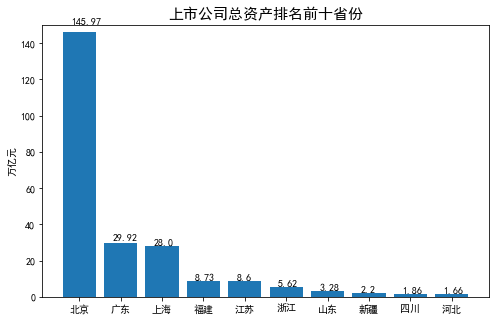

In [74]:
def autolabel(fig):
    for f in fig:
        height = f.get_height()
        plt.text(f.get_x()+f.get_width()/2.-0.2, 
                 1.03*height, '%s' % round(float(height),2))   

TA_top=totalAssets.sort_values(ascending=False)[:10]
d=dict(TA_top)
plt.figure(figsize=(8,5))
fig=plt.bar(d.keys(), d.values())
autolabel(fig)   
plt.title("上市公司总资产排名前十省份",fontsize=15)
plt.ylim(0,150)
plt.ylabel('万亿元')
plt.show()

In [75]:
#保留需要分析的特征数据
d=['name','industry','pe','pb','totalAssets',
   'esp','rev','profit','gpr','npr']
df=data[d]
df.head(3)

,name,industry,pe,pb,totalAssets,esp,rev,profit,gpr,npr
code,,,,,,,,,,
002966,N苏银,银行,13.39,1.45,33626784.00,0.211,0.0,0.0,0.00,28.48
688002,睿创微纳,通信设备,237.74,13.95,124354.82,0.145,0.0,0.0,51.38,25.46
688009,中国通号,运输设备,47.43,3.46,8360059.00,0.064,0.0,0.0,24.43,8.58


In [76]:
df.describe().round(2)

,pe,pb,totalAssets,esp,rev,profit,gpr,npr
count,3676.00,3676.00,3.676000e+03,3676.00,3676.00,3676.00,3676.00,3676.00
mean,80.22,4.36,6.865836e+06,0.11,442.53,72.46,28.80,36.25
std,313.81,43.49,8.914384e+07,0.33,24998.89,1740.50,25.85,2125.92
min,0.00,-352.64,2.624930e+03,-0.82,-99.42,-8194.57,-742.23,-7219.03
25%,11.76,1.45,1.773445e+05,0.01,-5.06,-26.18,15.72,1.68
50%,26.69,2.23,4.076213e+05,0.06,7.46,7.10,26.48,6.26
75%,57.81,3.53,1.066396e+06,0.14,25.25,43.66,39.15,13.78
max,9893.91,2053.61,2.924657e+09,15.88,1515062.25,80735.40,99.91,128547.06


In [77]:
df[df.pb<0]

,name,industry,pe,pb,totalAssets,esp,rev,profit,gpr,npr
code,,,,,,,,,,
002477,*ST雏鹰,农业综合,0.00,-207.41,1963674.75,-0.352,-65.10,-997.43,-107.15,-278.26
002018,*ST华信,农药化肥,0.00,-1.81,67327.80,-0.011,-93.67,64.07,20.16,-55.45
000953,*ST河化,农药化肥,0.00,-4.11,41590.00,-0.056,-57.87,58.48,3.81,-66.33
600877,*ST嘉陵,电气设备,0.00,-21.79,90046.31,-0.040,-64.36,81.16,-5.65,-72.06
600701,*ST工新,综合类,0.00,-13.93,667525.81,-0.127,-64.10,-305.78,42.50,-61.36
000927,一汽夏利,汽车整车,0.00,-56.91,409089.97,-0.125,-64.06,10.75,-113.44,-147.56
002072,*ST凯瑞,互联网,0.00,-4.02,43385.55,-0.022,-94.27,26.34,11.19,-157.92
300116,坚瑞沃能,电气设备,0.00,-11.10,1566351.50,-0.222,-90.40,-69.27,24.37,-503.89
600815,*ST厦工,工程机械,0.00,-16.60,493092.81,-0.003,-31.40,-119.51,14.94,-0.46


In [78]:
#对数据进一步清洗
#剔除掉市盈率为负数或0的股票
df=df[df.pe>0]
#剔除掉市净率为负数的股票
df=df[df.pb>0]
df.describe().round(2)

,pe,pb,totalAssets,esp,rev,profit,gpr,npr
count,3108.00,3108.00,3.108000e+03,3108.00,3108.00,3108.00,3108.00,3108.00
mean,94.86,3.08,8.001620e+06,0.14,523.03,132.26,30.73,55.39
std,339.25,4.81,9.690416e+07,0.34,27187.27,1861.57,19.15,2305.88
min,2.24,0.47,5.158050e+03,-0.07,-96.62,-98.55,-26.83,0.01
25%,17.99,1.47,1.934597e+05,0.03,-1.31,-13.68,17.08,3.51
50%,32.86,2.21,4.463317e+05,0.08,9.25,10.23,27.80,8.09
75%,68.94,3.43,1.180282e+06,0.16,26.58,48.64,40.15,15.72
max,9893.91,187.72,2.924657e+09,15.88,1515062.25,80735.40,99.91,128547.06


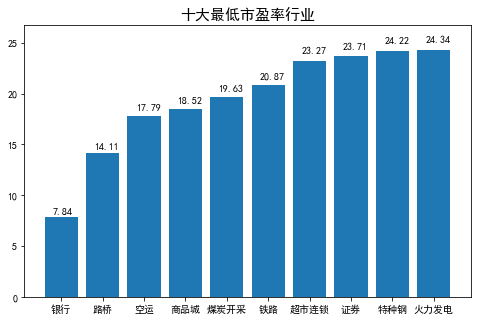

In [79]:
#定义一个画图函数
def plot_data(data,title):
    d=dict(data)
    plt.figure(figsize=(8,5))
    fig=plt.bar(d.keys(), d.values())
    autolabel(fig)   
    plt.title(title,fontsize=15)
    plt.ylim(0,max(d.values())*1.1)
    plt.show()
#查看十大最低市盈率行业
#这里行业划分不是很严谨，直接从数据库导出的
pe_ind=df.groupby('industry')['pe'].mean()
pe=pe_ind.sort_values()[:10].round(2)
title='十大最低市盈率行业'
plot_data(pe,title)

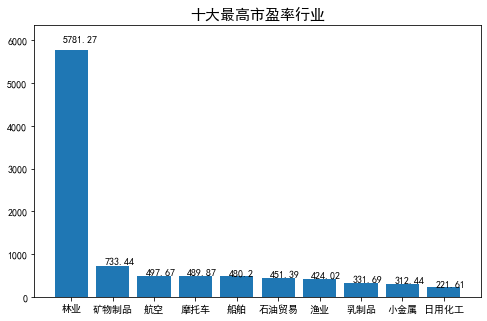

In [80]:
#查看十大最高市盈率行业
pe_ind1=df.groupby('industry')['pe'].mean()
pe1=pe_ind.sort_values(ascending=False)[:10].round(2)
title1='十大最高市盈率行业'
plot_data(pe1,title1)

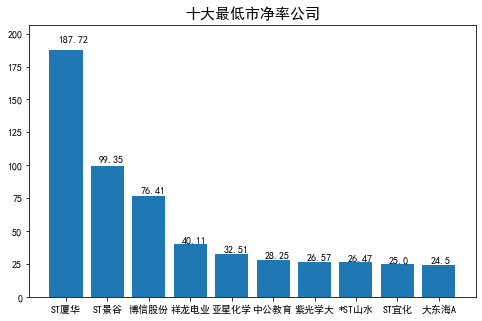

In [81]:
pb=df['pb']
pb.index=df['name']
pb10=pb.sort_values(ascending=False)[:10].round(2)
title='十大最高市净率公司'
plot_data(pb10,title)

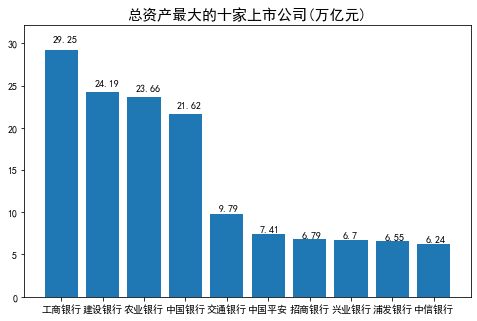

In [84]:
#查看总资产最大的十家上市公司（万亿元）
TA=(df['totalAssets']/10**8).round(2)
TA.index=df['name']
TA10=TA.sort_values(ascending=False)[:10]
title='总资产最大的十家上市公司(万亿元)'
plot_data(TA10,title)

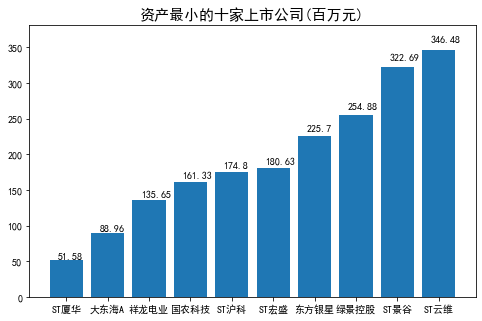

In [85]:

#再来看看总资产最小的十家上市公司（百万元）
TA1=(df['totalAssets']/100).round(2)
TA1.index=df['name']
TA2=TA1.sort_values(ascending=True)[:10]
title1='资产最小的十家上市公司(百万元)'
plot_data(TA2,title1)
#注意：这里是剔除了某些异常值后的数据结果

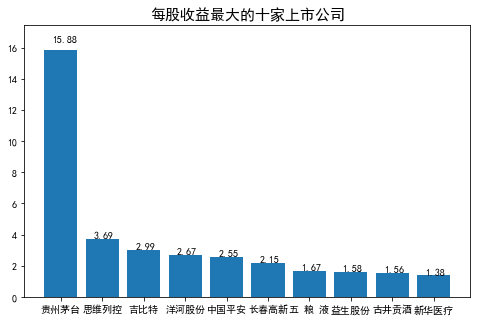

In [86]:
#每股收益最大的十家上市公司
esp=(df['esp'])
esp.index=df['name']
esp10=esp.sort_values(ascending=False)[:10]
title='每股收益最大的十家上市公司'
plot_data(esp10,title)
#贵州茅台一枝独秀，遥遥领先
#下面几家公司就是传说中的白马股啦
#白马股特征：长期绩优、回报率高并具有较高投资价值的股票

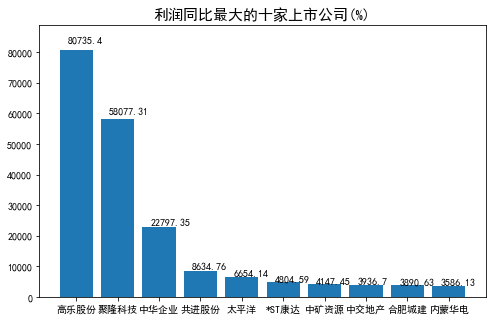

In [88]:
#利润同比最大的十家上市公司（%）
profit=(df['profit'])
profit.index=df['name']
profit10=profit.sort_values(ascending=False)[:10]
title='利润同比最大的十家上市公司(%)'
plot_data(profit10,title)

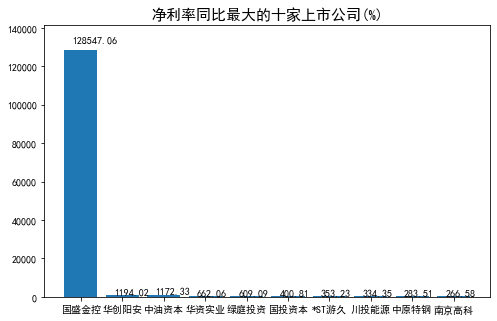

In [89]:
#净利率同比最大的十家上市公司（%）
npr=(df['npr'])
npr.index=df['name']
npr10=npr.sort_values(ascending=False)[:10]
title='净利率同比最大的十家上市公司(%)'
plot_data(npr10,title)